# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.038952e+01     7.777493e+00
 * time: 0.002118825912475586
     1     2.974555e+01     4.681573e+00
 * time: 0.008478879928588867
     2     2.190209e+01     7.350986e+00
 * time: 0.015390872955322266
     3     1.650396e+01     6.868569e+00
 * time: 0.02230381965637207
     4     1.357384e+01     4.316180e+00
 * time: 0.029006004333496094
     5     1.016396e+01     1.430106e+00
 * time: 0.036090850830078125
     6     9.470781e+00     2.013399e+00
 * time: 0.04215383529663086
     7     8.922552e+00     1.116494e+00
 * time: 0.04798293113708496
     8     8.565700e+00     8.516263e-01
 * time: 0.05372881889343262
     9     8.371597e+00     9.865844e-01
 * time: 0.059697866439819336
    10     8.205215e+00     7.285928e-01
 * time: 0.06576991081237793
    11     8.075375e+00     4.836923e-01
 * time: 0.07191300392150879
    12     8.002244e+00     6.186443e-01
 * time: 0.07803583145141602
    13     7.926944e+00     4.009936e-01
 *

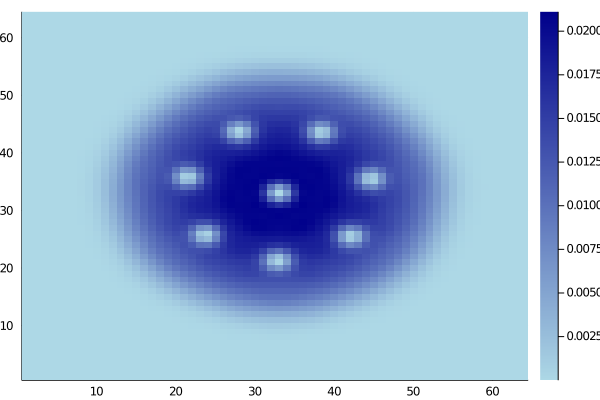

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)